In [1]:
__author__      = "Nigatu, Biz"
__copyright__   = "Copyright 2020, Nigatu.com"

import numpy as np
import pandas as pd
import math
from numpy import array
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt



# Function

In [2]:
def sphere(x):
    return sum ([y**2 for y in x])

#sanity
x = [1,2,3]
sphere(x)

14

# Problem definition
----

In [3]:
utility_function = sphere # cost function
n_var = 5; # number of unkown/ decision variables
var_size = array([1, n_var]) # matrix size of decision variables
var_min = -10 # lower bound of decision variable
var_max = 10 # upper bound of decision variables
max_velocity = 0.2* (var_max - var_min)
min_velocity = -max_velocity




# PSO parameters
-----

<h3><u>Constriction Coefficients</u>

$\chi = \frac{2\kappa}{\lvert 2-\phi - \sqrt{\phi^2 - 4\phi} \rvert} $
 
$where: 0 \leq \kappa \leq 1$
<br>
$\;\;\;\;\;\;\;\;\;\;\phi = \phi_1 + \phi_2 \geq 4 $</h3> 
 

In [4]:
kappa = 1
phi1 = 2.05
phi2 = 2.05
phi = phi1 + phi1
chi = 2 * kappa / abs(2 - phi - math.sqrt(phi**2 - 4* phi))

max_iter = 1000 # maximum iteration
n_pop = 50 # population/swarm size
w = chi # inertia coefficient
w_damp = 1 # damping ratio of inertia coefficient
c1 = chi * phi1 # personal acceleration coefficient
c2 = chi * phi2 # social/ global acceleration coefficient
show_iter_info = True # show iteration information

# Initialization
----

In [5]:
global_best = {'Cost': float('inf'), # global cost for minimization problem before optimization is infinity
               'Position': np.zeros(var_size)[0]} # global positoin
best_cost = {} # vector of best costs
empty_particle = {'Position': [],
                  'Velocity': [],
                  'Cost': [],
                  'BestPosition': [],
                  'BestCost': []} # empty dict template variable

particle = np.tile(empty_particle, (n_pop,1)) # create particle of size n_pop


tmp = [] # temp var
for p in particle: 
    x = np.random.uniform(var_min, var_max, var_size)[0] # generate a random solution
    tmp.append({'Position': x, # add particle (i) position for random x
                'Velocity': np.zeros(var_size), # intialize velocity to vector of zero's size var_size
                'Cost': utility_function(x), # evaluate the cost function
                'BestPosition': x, # update personal best to current position
                'BestCost': utility_function(x) # update best cost to current cost
               })
    if utility_function(x) < global_best['Cost']: 
        global_best['Cost'] = utility_function(x)  # replace global_best[Cost] if current_cost is better
        global_best['Position'] = x  # replace global_best[Position] if current_cost is better
    
particle = tmp    

# sanity test
print('global_cost =',global_best['Cost'])
print('global_postion =',global_best['Position'])
#pd.DataFrame(particle).head(2)


global_cost = 59.64772423349538
global_postion = [ 2.46091651 -3.01579963  5.46084206 -3.12011952 -2.22275165]


# PSO main loop
----

In [6]:
for r in tqdm(range(max_iter)):
    for i in range(n_pop):
        """update velocity"""
        particle[i]['Velocity'] = np.squeeze(w * particle[i]['Velocity'] + \
                                  np.multiply((c1 * np.random.rand(var_size[0],var_size[1])[0]), \
                                              (particle[i]['BestPosition'] - particle[i]['Position'][0])) + \
                                  np.multiply((c2 * np.random.rand(var_size[0],var_size[1])[0]), \
                                     (global_best['Position'] - particle[i]['Position']))) # equation 1
        """apply velocity limits"""
        particle[i]['Velocity'] = np.maximum(particle[i]['Velocity'], min_velocity)
        particle[i]['Velocity'] = np.minimum(particle[i]['Velocity'], max_velocity)
        """update positon""" 
        particle[i]['Position'] = np.squeeze(particle[i]['Position'] + particle[i]['Velocity']) # equation 2 
        """apply lower-upper bound limits"""
        particle[i]['Position'] = np.maximum(particle[i]['Position'], var_min)
        particle[i]['Position'] = np.minimum(particle[i]['Position'], var_max)
        """evaluation"""
        particle[i]['Cost'] = utility_function(particle[i]['Position']) # equation 3
        """update personal best"""
        if particle[i]['Cost'] < particle[i]['BestCost']: 
            particle[i]['BestCost'] = particle[i]['Cost']
            particle[i]['BestPosition'] = particle[i]['Position'] # equation 4         
        """update global best"""
        if particle[i]['BestCost'] < global_best['Cost']: # equation 5
            global_best['Cost'] = particle[i]['BestCost']
            global_best['Position'] = particle[i]['Position']
    w *= w_damp
    best_cost[r] = global_best['Cost']
    if r % 50 == 0 or r == max_iter-1:
        print("itter: %d best_cost: %f" % (r, global_best['Cost']))
        
print("final best_cost: %f \nbest_position: %s" % (global_best['Cost'], str(global_best['Position']) ))  
    

itter: 0 best_cost: 29.748573
itter: 50 best_cost: 0.120425
itter: 100 best_cost: 0.050334
itter: 150 best_cost: 0.010788
itter: 200 best_cost: 0.003608
itter: 250 best_cost: 0.003002
itter: 300 best_cost: 0.002862
itter: 350 best_cost: 0.002355
itter: 400 best_cost: 0.001341
itter: 450 best_cost: 0.001341
itter: 500 best_cost: 0.000151
itter: 550 best_cost: 0.000114
itter: 600 best_cost: 0.000080
itter: 650 best_cost: 0.000009
itter: 700 best_cost: 0.000003
itter: 750 best_cost: 0.000000
itter: 800 best_cost: 0.000000
itter: 850 best_cost: 0.000000
itter: 900 best_cost: 0.000000
itter: 950 best_cost: 0.000000
itter: 999 best_cost: 0.000000

final best_cost: 0.000000 
best_position: [-4.06284600e-06 -3.40693044e-06 -3.89274948e-07 -4.04148438e-06
  6.15179129e-07]


# Result
-----

Text(0, 0.5, 'Best Cost')

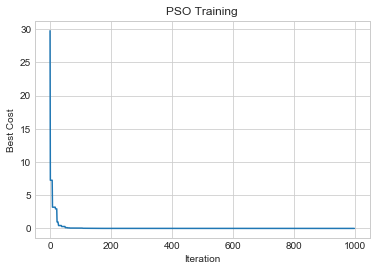

In [7]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

items = sorted(best_cost.items())
x, y = zip(*items) 

ax.plot(x, y);
plt.title('PSO Training')
plt.xlabel('Iteration')
plt.ylabel('Best Cost')


Text(0, 0.5, 'Best Cost')

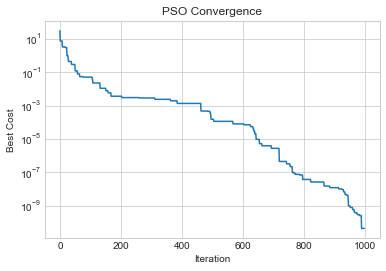

In [8]:
plt.semilogy(x, y )
plt.title('PSO Convergence')
plt.xlabel('Iteration')
plt.ylabel('Best Cost')

# Object Oriented Implementation
---

In [9]:
class Param(object):
    def __init__(self, max_iter = 1000, n_pop = 50, kappa = 1,phi1 = 2.05, phi2 = 2.05, w_damp = 1, show_iter_info = True):
        #super(Param, self).__init__(max_iter, n_pop, kappa, phi1, phi2, w_damp, show_iter_info)
        self.kappa = kappa
        self.phi1 = phi1
        self.phi2 = phi2
        self.phi = phi1 + phi1
        self.chi = 2 * self.kappa / abs(2 - self.phi - math.sqrt(self.phi**2 - 4* self.phi))

        self.max_iter = max_iter # maximum iteration
        self.n_pop = n_pop # population/swarm size
        self.w = self.chi # inertia coefficient
        self.w_damp = w_damp # damping ratio of inertia coefficient
        self.c1 = self.chi * self.phi1 # personal acceleration coefficient
        self.c2 = self.chi * self.phi2 # social/ global acceleration coefficient
        self.show_iter_info = show_iter_info # show iteration information
        self.global_best = {} # global best
        self.best_cost = [] # vector of best costs
        self.empty_particle = {} # empty dict template variable
        self.particle = {}
    def get_particle(self):
         raise NotImplementedError
    def __repr__(self):
        return ("""
                kappa = %r 
                phi1 = %r
                phi2 = %r
                phi = %r
                chi = %r
                max_iter = %r
                n_pop = %r
                w = %r
                w_damp = %r
                c1 = %r
                c2 = %r
                show_iter_info = %r
               """ % (self.kappa,
                      self.phi1,
                      self.phi2,
                      self.phi,
                      self.chi,
                      self.max_iter,
                      self.n_pop,
                      self.w,
                      self.w_damp,
                      self.c1,
                      self.c2,
                      self.show_iter_info))
#sanity        
# param = Param()
# print(param)

In [10]:
class Init(Param):
    def __init__(self, max_iter = 1000, n_pop = 50, kappa = 1,phi1 = 2.05, phi2 = 2.05, w_damp = 1, show_iter_info = True):
        super(Init, self).__init__(max_iter, n_pop, kappa, phi1, phi2, w_damp, show_iter_info)
        self.global_best = {'Cost': float('inf'), # global cost for minimization problem before optimization is infinity
                            'Position': np.zeros(var_size)[0]} # global positoin
        self.best_cost = {} # vector of best costs
        self.empty_particle = {'Position': [],
                          'Velocity': [],
                          'Cost': [],
                          'BestPosition': [],
                          'BestCost': []} # empty dict template variable
        self.particle = self.get_particle() # create particle of size n_pop

    def get_particle(self):
        particle = np.tile(self.empty_particle, (self.n_pop,1)) # create particle of size n_pop
        tmp = [] # temp var
        for p in particle: 
            x = np.random.uniform(var_min, var_max, var_size)[0] # generate a random solution
            tmp.append({'Position': x, # add particle (i) position for random x
                        'Velocity': np.zeros(var_size), # intialize velocity to vector of zero's size var_size
                        'Cost': utility_function(x), # evaluate the cost function
                        'BestPosition': x, # update personal best to current position
                        'BestCost': utility_function(x) # update best cost to current cost
                       })
            if utility_function(x) < self.global_best['Cost']: 
                self.global_best['Cost'] = utility_function(x)  # replace global_best[Cost] if current_cost is better
                self.global_best['Position'] = x  # replace global_best[Position] if current_cost is better
        return tmp 
    
    def __repr__(self):
        return super().__repr__()  + \
               """
                global_cost = %s
                global_postion = %s
               """ % (self.global_best['Cost'], self.global_best['Position'])
    
# sanity
# init = Init()
# print(init)

In [11]:
class PSO(Init):
    def __init__(self, max_iter = 1000, n_pop = 50, kappa = 1,phi1 = 2.05, phi2 = 2.05, w_damp = 1, show_iter_info = True):
        super(PSO, self).__init__(max_iter, n_pop, kappa, phi1, phi2, w_damp, show_iter_info)
        pass
    
    def pso(self):
        for r in tqdm(range(self.max_iter)):
            for i in range(self.n_pop):
                """update velocity"""
                self.particle[i]['Velocity'] = np.squeeze(self.w * self.particle[i]['Velocity'] + \
                                          np.multiply((self.c1 * np.random.rand(var_size[0],var_size[1])[0]), \
                                                      (self.particle[i]['BestPosition'] - self.particle[i]['Position'][0])) + \
                                          np.multiply((self.c2 * np.random.rand(var_size[0],var_size[1])[0]), \
                                             (self.global_best['Position'] - self.particle[i]['Position']))) # equation 1
                """apply velocity limits"""
                self.particle[i]['Velocity'] = np.maximum(self.particle[i]['Velocity'], min_velocity)
                self.particle[i]['Velocity'] = np.minimum(self.particle[i]['Velocity'], max_velocity)
                """update positon""" 
                self.particle[i]['Position'] = np.squeeze(self.particle[i]['Position'] + self.particle[i]['Velocity']) # equation 2 
                """apply lower-upper bound limits"""
                self.particle[i]['Position'] = np.maximum(self.particle[i]['Position'], var_min)
                self.particle[i]['Position'] = np.minimum(self.particle[i]['Position'], var_max)
                """evaluation"""
                self.particle[i]['Cost'] = utility_function(self.particle[i]['Position']) # equation 3
                """update personal best"""
                if self.particle[i]['Cost'] < self.particle[i]['BestCost']: 
                    self.particle[i]['BestCost'] = self.particle[i]['Cost']
                    self.particle[i]['BestPosition'] = self.particle[i]['Position'] # equation 4         
                """update global best"""
                if self.particle[i]['BestCost'] < self.global_best['Cost']: # equation 5
                    self.global_best['Cost'] = self.particle[i]['BestCost']
                    self.global_best['Position'] = self.particle[i]['Position']
            self.w *= self.w_damp
            self.best_cost[r] = self.global_best['Cost']
            if r % 50 == 0 or r == self.max_iter-1:
                print("itter: %d best_cost: %f" % (r, self.global_best['Cost']))
        print("final best_cost: %f \nbest_position: %s" % (self.global_best['Cost'], str(self.global_best['Position']) ))
        return self.global_best['Cost'], str(self.global_best['Position'])
    def display(self, graph='plot'):
        if(len(self.best_cost) == 0): return "Run you_object.pso() first."
        %matplotlib inline
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        ax = plt.axes()
        items = sorted(self.best_cost.items())
        x, y = zip(*items) 
        if (graph=='plot'):
            ax.plot(x, y);
            plt.title('PSO Training')
            plt.xlabel('Iteration')
            plt.ylabel('Best Cost')
        elif (graph=='semilogy'):
            plt.semilogy(x, y )
            plt.title('PSO Convergence')
            plt.xlabel('Iteration')
            plt.ylabel('Best Cost')        
    def __repr__(self):
        return super().__repr__()  
                  
        

In [12]:
pso = PSO()
pso.pso()

itter: 0 best_cost: 33.991001
itter: 50 best_cost: 1.036756
itter: 100 best_cost: 0.020032
itter: 150 best_cost: 0.002777
itter: 200 best_cost: 0.000274
itter: 250 best_cost: 0.000040
itter: 300 best_cost: 0.000004
itter: 350 best_cost: 0.000003
itter: 400 best_cost: 0.000000
itter: 450 best_cost: 0.000000
itter: 500 best_cost: 0.000000
itter: 550 best_cost: 0.000000
itter: 600 best_cost: 0.000000
itter: 650 best_cost: 0.000000
itter: 700 best_cost: 0.000000
itter: 750 best_cost: 0.000000
itter: 800 best_cost: 0.000000
itter: 850 best_cost: 0.000000
itter: 900 best_cost: 0.000000
itter: 950 best_cost: 0.000000
itter: 999 best_cost: 0.000000

final best_cost: 0.000000 
best_position: [ 4.61533124e-08 -5.30349479e-09 -3.02241719e-08  1.21532736e-08
 -2.42517884e-08]


(3.807607177069591e-15,
 '[ 4.61533124e-08 -5.30349479e-09 -3.02241719e-08  1.21532736e-08\n -2.42517884e-08]')

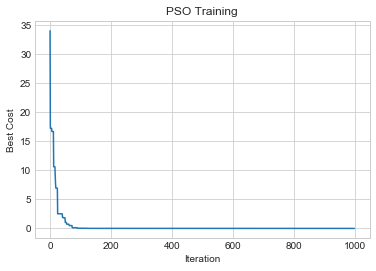

In [13]:
pso.display(graph='plot')

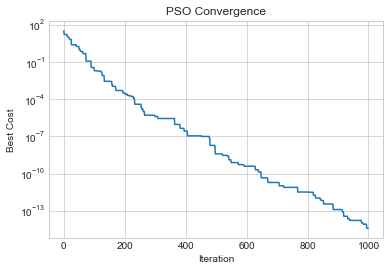

In [14]:
pso.display(graph='semilogy')